In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')

sp = pd.DataFrame(houseData['SalePrice'])
ca = pd.DataFrame(houseData['CentralAir'])

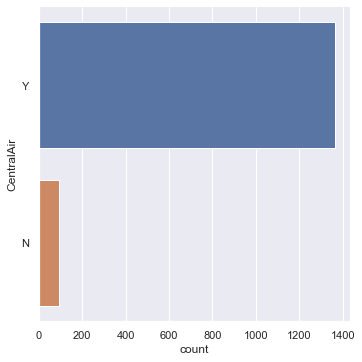

In [3]:
# Count Plot for CentralAir
sb.catplot(y = "CentralAir", data = ca, kind = "count")

In [4]:
ca["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

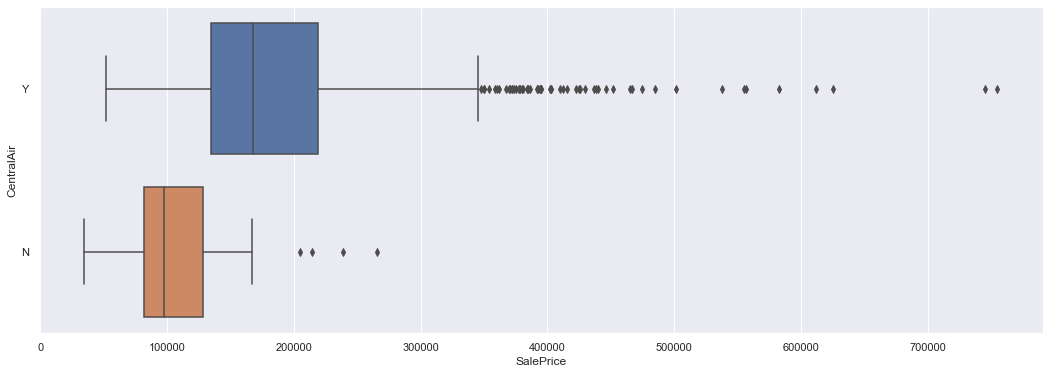

In [5]:
# Create a joint dataframe by concatenating SalePrice and CentralAir
houseDF = pd.concat([sp, ca], axis = 1).reindex(sp.index)

# Joint Boxplot of SalePrice against CentralAir
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = houseDF, orient = "h")

In [6]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [7]:
# Split the Dataset into Train and Test
catrain, catest, sptrain, sptest = train_test_split(ca, sp, test_size = 360)


In [8]:
# Train the Decision Tree Classifier model
dectree.fit(sptrain, catrain)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'SalePrice <= 98150.0\ngini = 0.116\nsamples = 1100\nvalue = [68, 1032]\nclass = CentralAir_Y'),
 Text(167.4, 326.16, 'SalePrice <= 61691.5\ngini = 0.483\nsamples = 86\nvalue = [35, 51]\nclass = CentralAir_Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = CentralAir_N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.447\nsamples = 74\nvalue = [25, 49]\nclass = CentralAir_Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 107700.0\ngini = 0.063\nsamples = 1014\nvalue = [33, 981]\nclass = CentralAir_Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.32\nsamples = 35\nvalue = [7, 28]\nclass = CentralAir_Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.052\nsamples = 979\nvalue = [26, 953]\nclass = CentralAir_Y')]

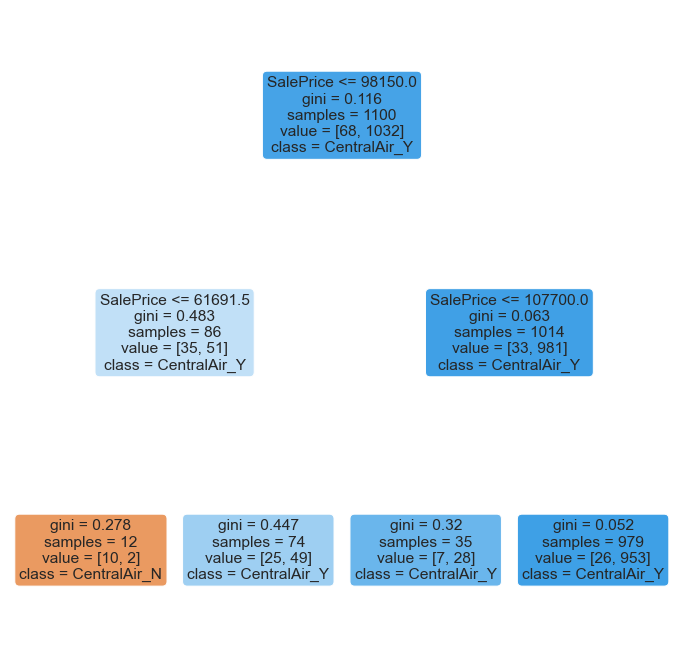

In [9]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["CentralAir_N","CentralAir_Y"])

Classification Accuracy 	: 0.9454545454545454


<AxesSubplot:>

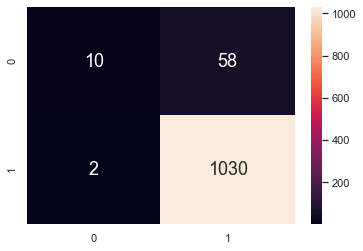

In [10]:
# Predict Legendary corresponding to Total Train
catrainpred = dectree.predict(sptrain)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sptrain, catrain))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(catrain, catrainpred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9333333333333333


<AxesSubplot:>

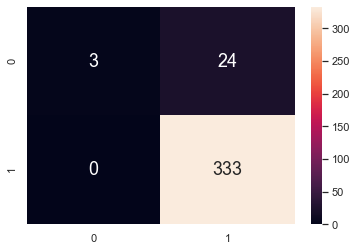

In [11]:
# Predict Legendary corresponding to Total Train
catestpred = dectree.predict(sptest)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sptest, catest))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(catest, catestpred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [12]:
def tree(pred,res):    

    preddf = pd.DataFrame(houseData[pred])
    resdf = pd.DataFrame(houseData[res])

    # Create a joint dataframe by concatenating SalePrice and CentralAir
    houseDF = pd.concat([resdf, preddf], axis = 1).reindex(sp.index)

    # Joint Boxplot of SalePrice against CentralAir
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = res, y = pred, data = houseDF, orient = "h")
    
    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = 2)

    # Split the Dataset into Train and Test
    predtrain, predtest, restrain, restest = train_test_split(preddf, resdf, test_size = 360)

    # Train the Decision Tree Classifier model
    dectree.fit(restrain, predtrain)

    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names=["Response"], 
              class_names=["Pred_No","Pred_Yes"])
    
    # Predict Response (Train) based on Predictor (Train)
    predtrainpred = dectree.predict(restrain)

    # Print the Classification Accuracy
    CAtrain = dectree.score(restrain, predtrain)
    print("Classification Accuracy (Train)\t\t:", CAtrain)
    
    # Plot the two-way Confusion Matrix
    plt.figure(figsize=(4,4))
    ConfusionTrain = confusion_matrix(predtrain, predtrainpred)
    sb.heatmap(ConfusionTrain, 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    
    FPtrain = ConfusionTrain[0][1]
    FNtrain = ConfusionTrain[1][0]
    TPtrain = ConfusionTrain[1][1]
    TNtrain = ConfusionTrain[0][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPRtrain = TPtrain/(TPtrain+FNtrain)
    # Specificity or true negative rate
    TNRtrain = TNtrain/(TNtrain+FPtrain) 
    # Fall out or false positive rate
    FPRtrain = FPtrain/(FPtrain+TNtrain)
    # False negative rate
    FNRtrain = FNtrain/(TPtrain+FNtrain)
    # Overall accuracy
    ACCtrain = (TPtrain+TNtrain)/(TPtrain+FPtrain+FNtrain+TNtrain)
    print("True Positive Rate (Train)\t\t:", TPRtrain)
    print("True Negative Rate (Train)\t\t:", TNRtrain)
    print("False Positive Rate (Train)\t\t:", FPRtrain)
    print("False Negative Rate (Train)\t\t:", FNRtrain)

    # Predict Response (Test) based on Predictor (Test)
    predtestpred = dectree.predict(restest)

    # Print the Classification Accuracy
    CAtest = dectree.score(restest, predtest)
    print("Classification Accuracy (Test)\t\t:", CAtest)

    # Plot the two-way Confusion Matrix
    plt.figure(figsize=(4,4))
    ConfusionTest = confusion_matrix(predtest, predtestpred)
    sb.heatmap(ConfusionTest, 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    
    FPtest = ConfusionTest[0][1]
    FNtest = ConfusionTest[1][0]
    TPtest = ConfusionTest[1][1]
    TNtest = ConfusionTest[0][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPRtest = TPtest/(TPtest+FNtest)
    # Specificity or true negative rate
    TNRtest = TNtest/(TNtest+FPtest) 
    # Fall out or false positive rate
    FPRtest = FPtest/(FPtest+TNtest)
    # False negative rate
    FNRtest = FNtest/(TPtest+FNtest)
    # Overall accuracy
    ACCtest = (TPtest+TNtest)/(TPtest+FPtest+FNtest+TNtest)
    print("True Positive Rate (Test)\t\t:", TPRtest)
    print("True Negative Rate (Test)\t\t:", TNRtest)
    print("False Positive Rate (Test)\t\t:", FPRtest)
    print("False Negative Rate (Test)\t\t:", FNRtest)
    
    #Print the Weighted Classification Accuracy
    CAweight = (CAtrain*1100+CAtest*360)/1460
    print("Classification Accuracy (Weighted)\t:", CAweight)
    

Classification Accuracy (Train)		: 0.9427272727272727
True Positive Rate (Train)		: 1.0
True Negative Rate (Train)		: 0.16
False Positive Rate (Train)		: 0.84
False Negative Rate (Train)		: 0.0
Classification Accuracy (Test)		: 0.9416666666666667
True Positive Rate (Test)		: 0.9941176470588236
True Negative Rate (Test)		: 0.05
False Positive Rate (Test)		: 0.95
False Negative Rate (Test)		: 0.0058823529411764705
Classification Accuracy (Weighted)	: 0.9424657534246575


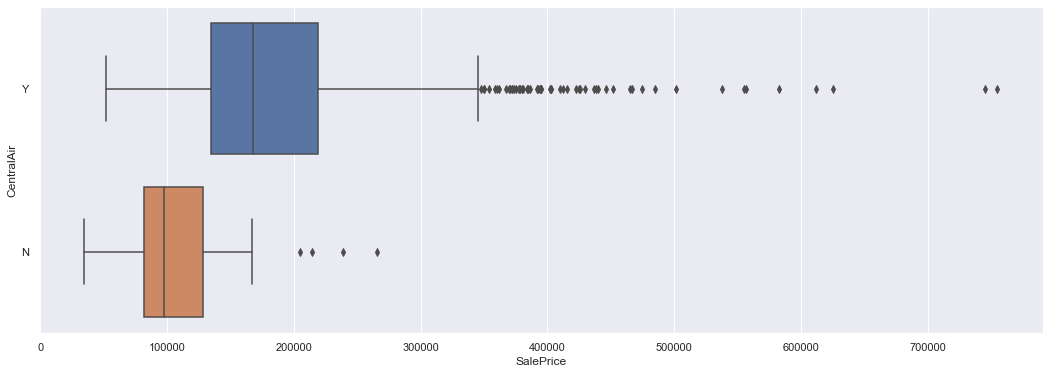

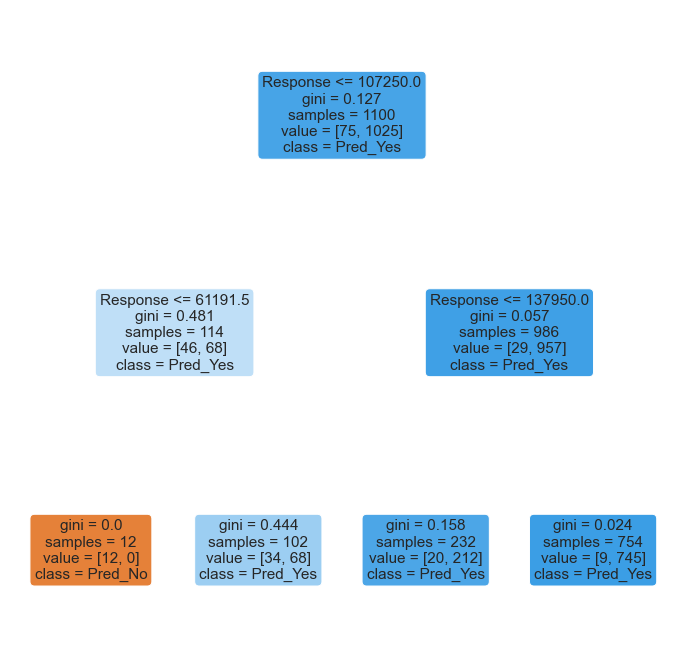

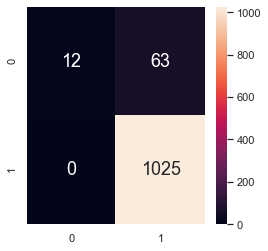

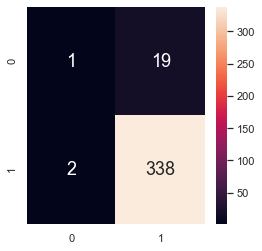

In [13]:
tree('CentralAir','SalePrice')

Classification Accuracy (Train)		: 0.9418181818181818
True Positive Rate (Train)		: 0.9893822393822393
True Negative Rate (Train)		: 0.171875
False Positive Rate (Train)		: 0.828125
False Negative Rate (Train)		: 0.010617760617760617
Classification Accuracy (Test)		: 0.8916666666666667
True Positive Rate (Test)		: 0.9726443768996961
True Negative Rate (Test)		: 0.03225806451612903
False Positive Rate (Test)		: 0.967741935483871
False Negative Rate (Test)		: 0.02735562310030395
Classification Accuracy (Weighted)	: 0.9294520547945205


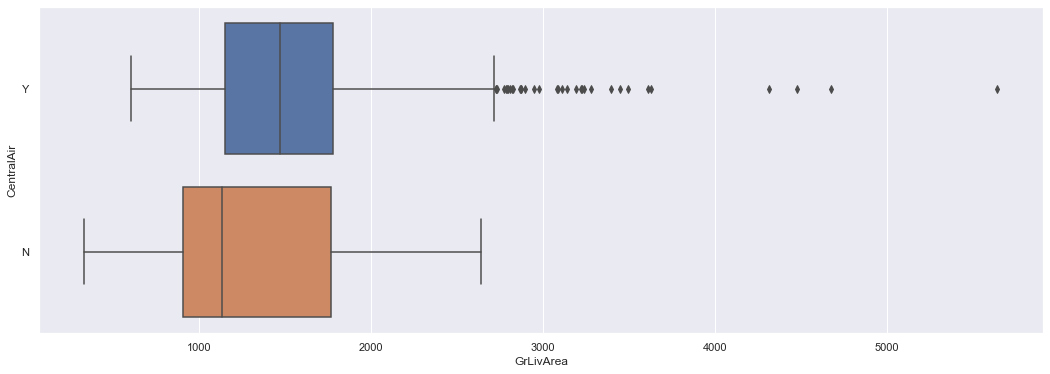

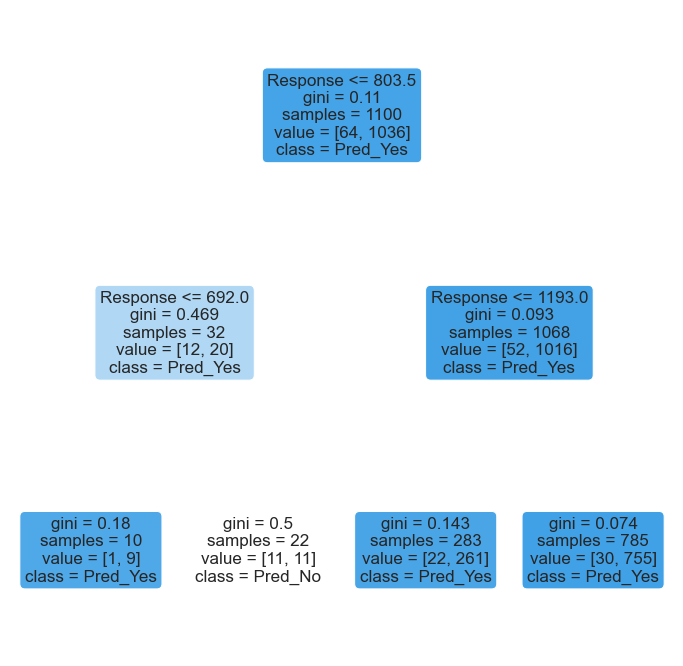

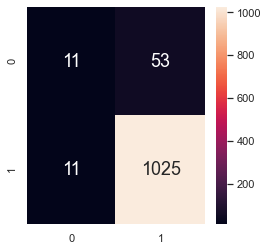

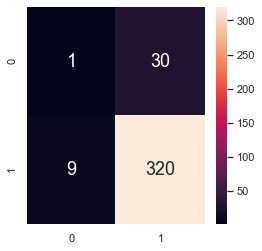

In [14]:
tree('CentralAir','GrLivArea')

Classification Accuracy (Train)		: 0.9409090909090909
True Positive Rate (Train)		: 0.9941690962099126
True Negative Rate (Train)		: 0.16901408450704225
False Positive Rate (Train)		: 0.8309859154929577
False Negative Rate (Train)		: 0.0058309037900874635
Classification Accuracy (Test)		: 0.9361111111111111
True Positive Rate (Test)		: 0.9910714285714286
True Negative Rate (Test)		: 0.16666666666666666
False Positive Rate (Test)		: 0.8333333333333334
False Negative Rate (Test)		: 0.008928571428571428
Classification Accuracy (Weighted)	: 0.9397260273972603


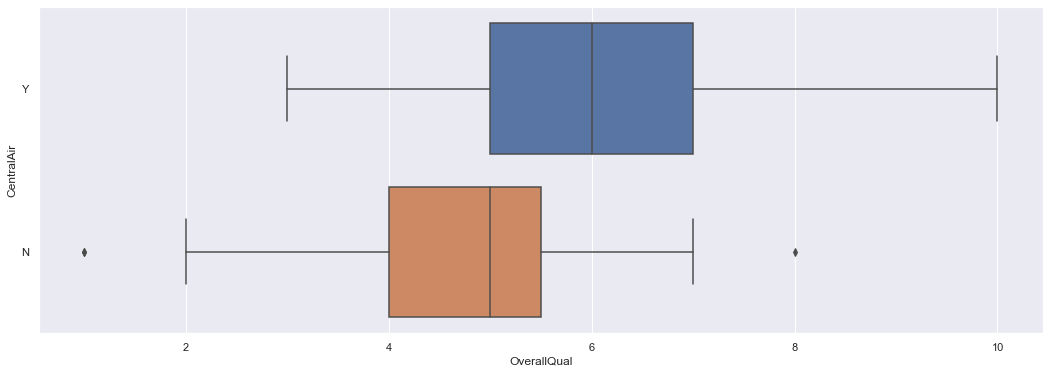

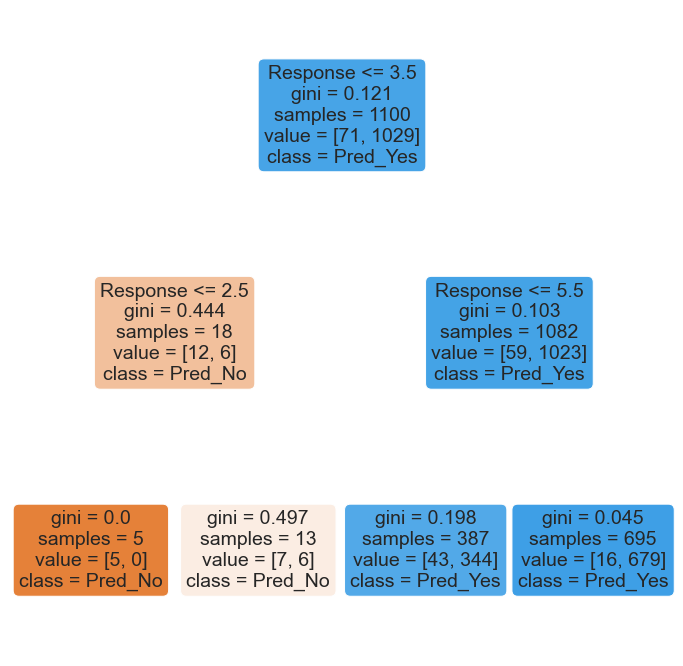

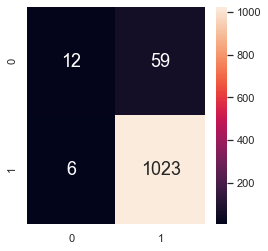

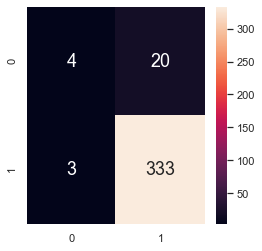

In [15]:
tree('CentralAir','OverallQual')

Classification Accuracy (Train)		: 0.9354545454545454
True Positive Rate (Train)		: 1.0
True Negative Rate (Train)		: 0.0
False Positive Rate (Train)		: 1.0
False Negative Rate (Train)		: 0.0
Classification Accuracy (Test)		: 0.9333333333333333
True Positive Rate (Test)		: 1.0
True Negative Rate (Test)		: 0.0
False Positive Rate (Test)		: 1.0
False Negative Rate (Test)		: 0.0
Classification Accuracy (Weighted)	: 0.934931506849315


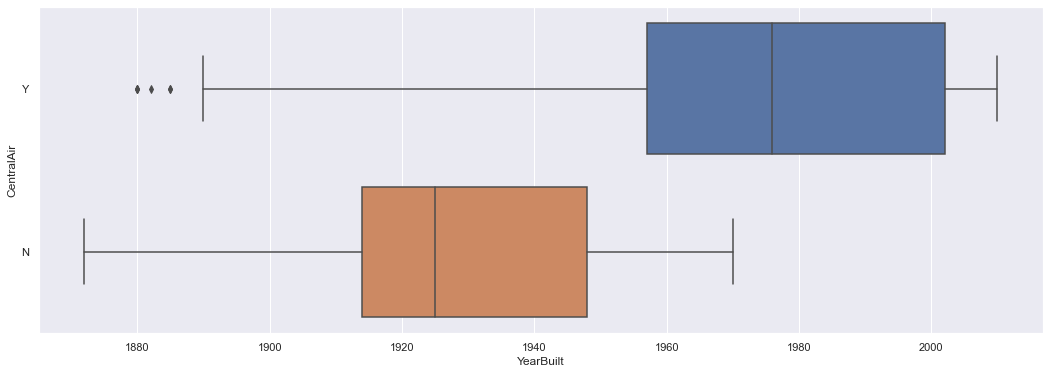

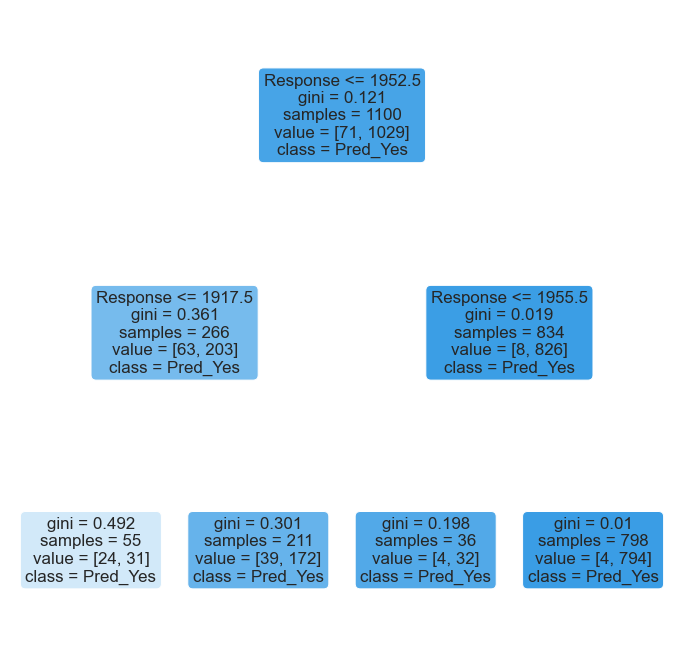

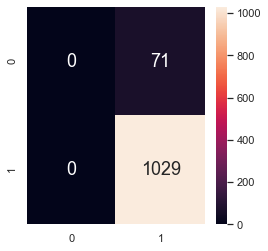

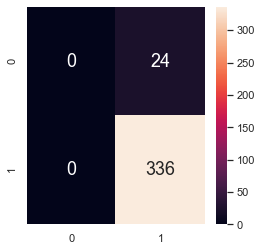

In [16]:
tree('CentralAir','YearBuilt')

In [18]:
#Saleprice
#Classification Accuracy (Train)		: 0.9427272727272727
#Classification Accuracy (Test)		: 0.9416666666666667
#Classification Accuracy (Weighted)	: 0.9424657534246575


#GrLivArea
#Classification Accuracy (Train)		: 0.9418181818181818
#Classification Accuracy (Test)		: 0.8916666666666667
#Classification Accuracy (Weighted)	: 0.9294520547945205

#OverallQual
#Classification Accuracy (Train)		: 0.9409090909090909
#Classification Accuracy (Test)		: 0.9361111111111111
#Classification Accuracy (Weighted)	: 0.9397260273972603


#YearBuilt
#Classification Accuracy (Train)		: 0.9354545454545454
#Classification Accuracy (Test)		: 0.9333333333333333
#Classification Accuracy (Weighted)	: 0.934931506849315


#SalePrice has best classification accuracy (calculated based on True
#Positive Rate, True Negative Rate, etc) for both train and test data
#sets, and thus it is the best model to use to predict CentralAir